<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


## Precise Predictions: Classification for Flower and Tumors


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/tenrjo9ryixw4mqpv9ys8v7jdr5q.png" width="50%">


Estimated time needed: **30** minutes


<p style='color: red'>The purpose of this lab is to show you how to create a classifier that can classify the various species of flowers. You will also build a classifier that detects cancerous tumours.</p>


## __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li><a href="#Datasets">Datasets</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
        </ol>
    </li>
    <li>
        <a href="#Examples">Examples</a>
        <ol>
            <li><a href="#Task-1---Load-the-data-in-a-csv-file-into-a-dataframe">Task 1 - Load the data in a csv file into a dataframe</a></li>
    <li><a href="#Task-2---Identify-the-target-column-and-the-data-columns">Task 2 - Identify the target column and the data columns</a></li>
    <li><a href="#Task-3---Build-and-train-a-classifier">Task 3 - Build and train a classifier</a></li>
    <li><a href="#Task-4---Evaluate-the-model">Task 4 - Evaluate the model</a></li>        </ol>
    </li>
    

## Task 4 - Evaluate the model and make predictions
<li><a href="#Exercises">Exercises</a></li>
<ol>
    <li><a href="#Exercise-1---Load-a-dataset">Exercise 1 - Load a dataset</a></li>
    <li><a href="#Exercise-2---Identify-the-target-column-and-the-data-columns">Exercise 2 - Identify the target column and the data columns</a></li>
    <li><a href="#Exercise-3---Build-and-Train-a-new-classifier">Exercise 3 - Build and Train a new classifier</a></li>
    <li><a href="#Exercise-4---Evaluate-the-model">Exercise 4 - Evaluate the model</a></li>
    <li><a href="#Exercise-5---Find-out-if-a-tumor-is-cancerous">Exercise 5 - Find out if a tumor is cancerous</a></li>
    </ol>
</ol>




## Objectives

After completing this lab you will be able to:

 - Use Pandas to load data sets.
 - Identify the target and features.
 - Use Logistic Regression to build a classifier.
 - Use metrics to evaluate the model.
 - Make predictions using a trained model.


## Datasets

In this lab you will be using dataset(s):

 - Modified version of iris dataset. Original dataset available at https://archive.ics.uci.edu/ml/datasets/Iris 
 - Modified version of Breast Cancer dataset.  Original dataset available at https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
 


## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `!pip` in the code cell below.


In [9]:
## All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !pip install pandas==1.3.4
# !pip install scikit-learn==0.20.1
%pip install pandas
%pip install scikit-learn
%pip install matplotlib

The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install them:


### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [3]:
# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.linear_model import LogisticRegression

## Task 1 - Load the data in a csv file into a dataframe


In [5]:
import requests

# the data set is available at the url below.
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/iris.csv"
response = requests.get(URL)
open('iris.csv', 'wb').write(response.content)

# using the read_csv function in the pandas library, we load the data into a dataframe.

df = pd.read_csv('iris.csv')

Let's look at some sample rows from the dataset we loaded:


In [6]:
# show 5 random rows from the dataset
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
56,6.3,3.3,4.7,1.6,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor
80,5.5,2.4,3.8,1.1,Iris-versicolor
140,6.7,3.1,5.6,2.4,Iris-virginica
45,4.8,3.0,1.4,0.3,Iris-setosa


Let's find out the number of rows and columns in the dataset:


In [7]:
df.shape

(150, 5)

Let's plot the types and count of species


<Axes: xlabel='Species'>

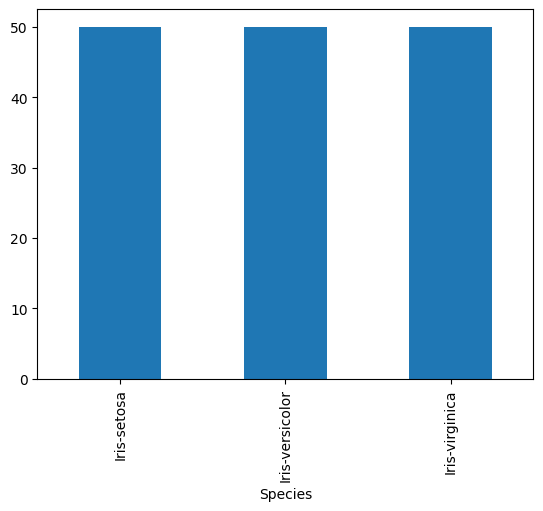

In [11]:
df.Species.value_counts().plot.bar()

You can see that there are 3 species and 50 flowers for each type of species. 


## Task 2 - Identify the target column and the data columns


First we identify the target. Target is the value that our machine learning model needs to classify


In [12]:
target = df["Species"]

We identify the features next. Features are the input values our machine learning model learns from


In [13]:
features = df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]

## Task 3 - Build and train a classifier


Create a Logistic Regression model


In [14]:
classifier = LogisticRegression()

Train/Fit the model


In [15]:
classifier.fit(features,target)

LogisticRegression()

## Task 4 - Evaluate the model


Your model is now trained. Time to evaluate the model.


In [16]:
#Higher the score, better the model.
classifier.score(features,target)

0.9733333333333334

Make predictions. Let us predict the species of a flower with SepalLengthCm = 5.4, SepalWidthCm = 2.6, PetalLengthCm = 4.1, PetalWidthCm = 1.3


In [17]:
classifier.predict([[5.4,2.6,4.1,1.3]])

array(['Iris-versicolor'], dtype=object)

In [ ]:
# it should be a Iris-versicolor 

# Exercises


In [18]:
URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/cancer.csv"

response = requests.get(URL2)
open('iris2.csv', 'wb').write(response.content)

# using the read_csv function in the pandas library, we load the data into a dataframe.




### Exercise 1 - Load a dataset


Load the cancer dataset available at URL2


In [19]:
df2 = pd.read_csv('iris2.csv')

<details>
    <summary>Click here for a Hint</summary>
    
Use the read_csv function

</details>


<details>
    <summary>Click here for Solution</summary>

```python
df2 = pd.read_csv(URL2)
```

</details>


### Exercise 2 - Identify the target column and the data columns


 - use the diagnosis column as target
 - use all the other columns except diagnosis as features


In [20]:
target = df2["diagnosis"]
features = df2[['radius_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'symmetry_mean']]

<details>
    <summary>Click here for a Hint</summary>
    
Refer to Task2
</details>


<details>
    <summary>Click here for Solution</summary>

```python
target = df2["diagnosis"]
features = df2[['radius_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'symmetry_mean']]
```

</details>


### Exercise 3 - Build and Train a new classifier


Create a new Classifier


In [21]:
classifier2 = LogisticRegression()
classifier2.fit(features,target)

LogisticRegression()

<details>
    <summary>Click here for a Hint</summary>
    
fit using the features and target
</details>


<details>
    <summary>Click here for Solution</summary>

```python
classifier2 = LogisticRegression()
classifier2.fit(features,target)

```

</details>


### Exercise 4 - Evaluate the model


Print the score of the model


In [22]:
classifier2.score(features,target)

0.8998242530755711

<details>
    <summary>Click here for a Hint</summary>
    
use the score() method
</details>


<details>
    <summary>Click here for Solution</summary>

```python
classifier2.score(features,target)

```

</details>


### Exercise 5 - Find out if a tumor is cancerous


Classify the tumor with

'radius_mean' = 13.45,
 'perimeter_mean'= 86.6,
 'area_mean' = 555.1,
 'smoothness_mean' = 0.1022,
 'compactness_mean' = 0.08165,
 'concavity_mean' = 0.03974,
 'symmetry_mean' = 0.1638
 
 						


In [23]:
#your code goes here
classifier2.predict([[13.45,86.6,555.1,0.1022,0.08165,0.03974,0.1638]])

array(['Benign'], dtype=object)

<details>
    <summary>Click here for a Hint</summary>
    
use the predict() method
</details>


<details>
    <summary>Click here for Solution</summary>

```python
classifier2.predict([[13.45,86.6,555.1,0.1022,0.08165,0.03974,0.1638]])

```

</details>


Congratulations you have completed this lab.<br>


## Authors


[Ramesh Sannareddy](https://www.linkedin.com/in/rsannareddy/)


## Contributors
[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


Copyright © 2023 IBM Corporation. All rights reserved.


<!-- ## Change Log -->


<!--
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-04-14|0.1|Ramesh Sannareddy|Initial Version Created|
|2023-06-20|0.3|Vicky Kuo|Proofreading|
-->
